# Notebook Imports 

In [32]:
from sklearn import mixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Generate sample data

In [33]:
X1 = 4 + np.random.rand(50, 2)
X2 = 5 + np.random.rand(50, 2)
X3 = 6 + np.random.rand(50, 2)
Z = np.concatenate((X1, X2, X3))

## Plot the sample data

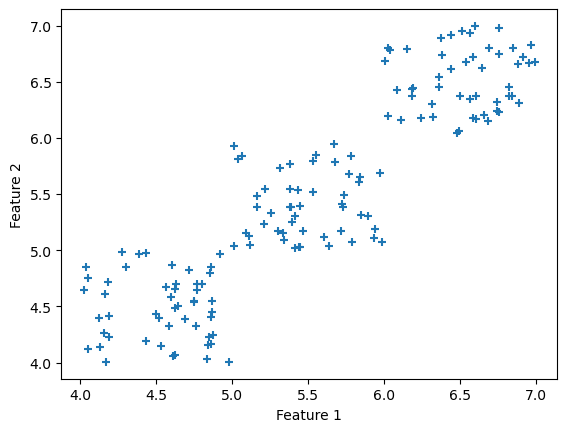

In [34]:
plt.scatter(Z[:, 0], Z[:, 1], marker='+')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Model

In [35]:
# choose “full” for the parameter covariance_type. “full” allows the components to independently adopt any position and shape.
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full') 
gmm.fit(Z)

labels = gmm.predict(Z)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


C:\Users\fatima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
probs = gmm.predict_proba(Z)
print(probs)

[[7.01927057e-20 9.99833907e-01 1.66092594e-04]
 [4.44289375e-20 9.99912003e-01 8.79969164e-05]
 [1.57826835e-22 9.99979100e-01 2.09002931e-05]
 [1.07013982e-25 9.99999615e-01 3.84856503e-07]
 [5.82236928e-18 9.99141064e-01 8.58936223e-04]
 [8.13997029e-19 9.99392986e-01 6.07013508e-04]
 [5.07575359e-21 9.99932332e-01 6.76682923e-05]
 [8.10492043e-22 9.99964542e-01 3.54579725e-05]
 [1.47543834e-23 9.99993944e-01 6.05560654e-06]
 [1.00617129e-27 9.99999966e-01 3.43938295e-08]
 [6.16896806e-25 9.99999573e-01 4.27254440e-07]
 [1.27999831e-27 9.99999964e-01 3.61470532e-08]
 [1.21983596e-22 9.99994484e-01 5.51604685e-06]
 [1.67895886e-16 9.93183163e-01 6.81683710e-03]
 [1.24154531e-23 9.99998342e-01 1.65836220e-06]
 [1.04087654e-22 9.99995872e-01 4.12825440e-06]
 [1.88655269e-22 9.99989197e-01 1.08027583e-05]
 [3.03373004e-19 9.99535131e-01 4.64869497e-04]
 [1.42640012e-17 9.97466962e-01 2.53303767e-03]
 [1.53282697e-26 9.99999899e-01 1.00981321e-07]
 [3.62280409e-22 9.99975730e-01 2.426953

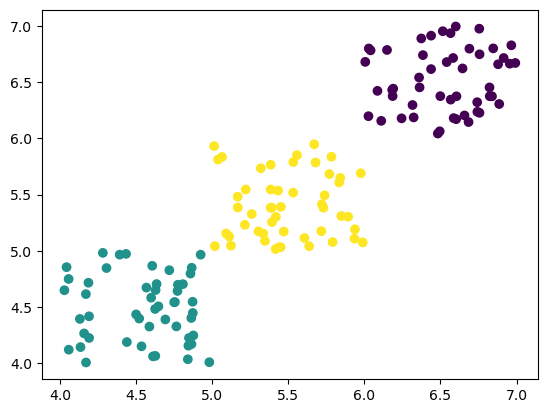

In [37]:
plt.scatter(x=Z[:,0], y=Z[:,1], c=labels, cmap='viridis')
plt.show()

# Generate new samples

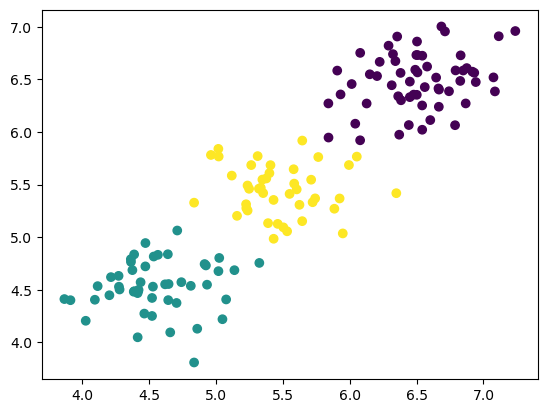

In [38]:
newdata = gmm.sample(150)

# extract the feature values, i.e. coordinates
vals = newdata[0]

# extract the labels
labs = newdata[1]
 
# plot the generated samples 
plt.scatter(x=vals[:,0], y=vals[:,1], c=labs)
plt.show()

# The Silhouette score and BIC

In [39]:
S = []
bic = []

n_clusters = [2, 3, 4, 5, 6]

for n in n_clusters: # k = 2 to 6
    gmm = mixture.GaussianMixture(n_components=n)
    gmm.fit(Z)
    lab = gmm.predict(Z)
    
    S.append(silhouette_score(Z, lab))
    bic.append(gmm.bic(Z))

C:\Users\fatima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fatima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fatima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fatima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

## Visualization

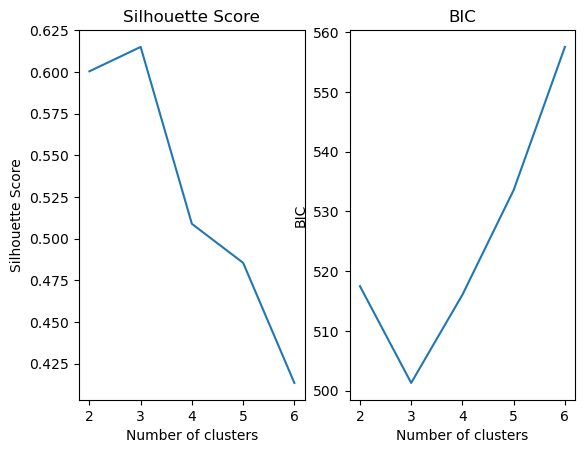

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
 
# first plot: Silhouette score
ax1.plot(n_clusters, S)
ax1.set_title('Silhouette Score')
ax1.set(xlabel='Number of clusters', ylabel='Silhouette Score')

# second plot: BIC
ax2.plot(n_clusters, bic)
ax2.set_title('BIC')
ax2.set(xlabel='Number of clusters', ylabel='BIC')

plt.show()